Kurs NBP waluty USD
               no effectiveDate     mid
0  169/A/NBP/2019    2019-09-02  3.9819
1  170/A/NBP/2019    2019-09-03  3.9882
2  171/A/NBP/2019    2019-09-04  3.9414
3  172/A/NBP/2019    2019-09-05  3.9330
4  173/A/NBP/2019    2019-09-06  3.9315
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
no               21 non-null object
effectiveDate    21 non-null object
mid              21 non-null float64
dtypes: float64(1), object(2)
memory usage: 632.0+ bytes
None
             mid
count  21.000000
mean    3.954800
std     0.034119
min     3.911600
25%     3.931500
50%     3.936200
75%     3.985600
max     4.015400

Konwertuję effectiveDate.

Sprawdzamy typy danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
no               21 non-null object
effectiveDate    21 non-null object
mid              21 non-null float64
dtypes: float64(1), object(2)
memory usage: 632.0+ 

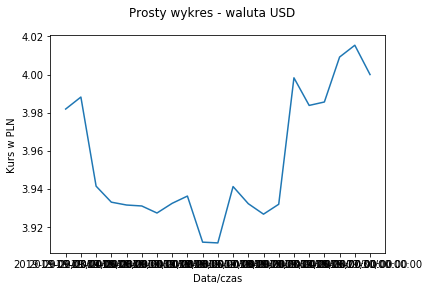


Kurs NBP waluty EUR
               no effectiveDate     mid
0  169/A/NBP/2019    2019-09-02  4.3691
1  170/A/NBP/2019    2019-09-03  4.3667
2  171/A/NBP/2019    2019-09-04  4.3385
3  172/A/NBP/2019    2019-09-05  4.3409
4  173/A/NBP/2019    2019-09-06  4.3392
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
no               21 non-null object
effectiveDate    21 non-null object
mid              21 non-null float64
dtypes: float64(1), object(2)
memory usage: 632.0+ bytes
None

Konwertuję effectiveDate.

Sprawdzamy typy danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
no               21 non-null object
effectiveDate    21 non-null object
mid              21 non-null float64
dtypes: float64(1), object(2)
memory usage: 632.0+ bytes
None

Dane po ustawieniu indexu:
                                 no     mid
effectiveDate                              
2019-09-02/00:00:00  169/

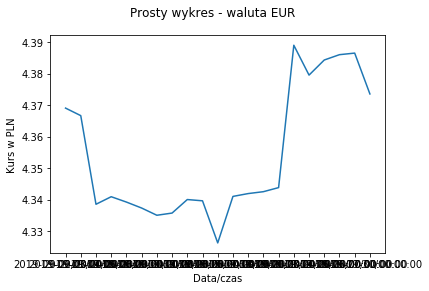

[[1.         0.95958617]
 [0.95958617 1.        ]]


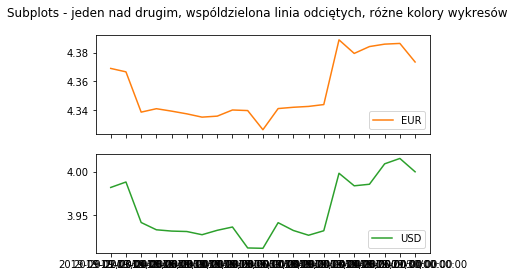

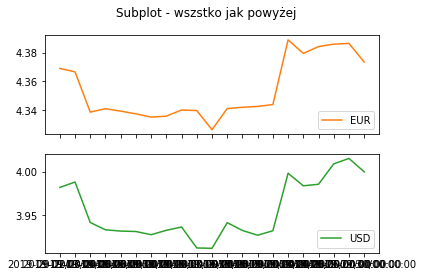

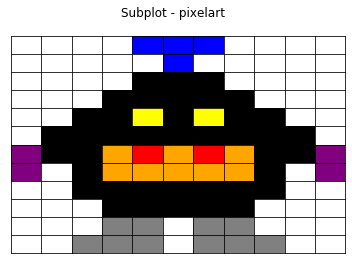

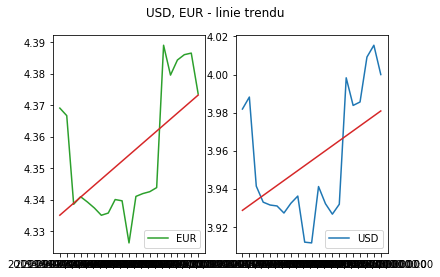

In [10]:
# Zadanie 1
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
import matplotlib.gridspec as gridspec
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Zadanie 1
# 1. Napisz funkcję do wczytywania waluty nbp z zadanego okresu (wszystko przekazywane jako parametr)
#    dowolny ze sposobów (plik csv, read_json, dowolne inne)

def fetchCurr(currency,dFrom,dTo):
    currency_req = requests.get('http://api.nbp.pl/api/exchangerates/rates/A/'+currency+'/'+dFrom+'/'+dTo+'/')
    currency_data = currency_req.json()
    return currency_data['rates']

# Funkcja zamieniająca id koloru na tekstowy kod
def getColor(id):
    colors = ['white','black','grey','lightgrey','yellow','blue','green','red','orange','purple']
    return colors[id]

curr1 = 'USD'
curr2 = 'EUR'
dFrom = '2019-09-01'
dTo = '2019-09-30'
# 2. Używając stworzonej funkcji wczytaj dane dwóch wybranych przez siebie kursów
# 3. Zbadaj wczytane dane za pomocą wybranych poleceń, oczyść jeżeli to konieczne i ustaw indeksy na datę.
print("Kurs NBP waluty {}".format(curr1))
rates = fetchCurr(curr1,dFrom,dTo)
ratesCurr1 = pd.DataFrame.from_dict(rates)

print(ratesCurr1.head())
print(ratesCurr1.info())
print(ratesCurr1.describe())

# Konwersja effectiveDate
print("\nKonwertuję effectiveDate.")

convType = 2

if convType == 1: # 1) Zamina daty na Epoch timestamp - uint32
    ratesCurr1['effectiveDate'] = (pd.to_datetime(ratesCurr1['effectiveDate']).astype(np.int64)/(10**9)).astype(np.uint32)
elif convType==2: # 2) Zamiana daty na formatowany datetime (data/czas) - object
    ratesCurr1['effectiveDate'] = pd.to_datetime(ratesCurr1['effectiveDate']).dt.strftime('%Y-%m-%d/%H:%M:%S')
elif convType==3: # 3) Zamiana typu object na datetime64 
    ratesCurr1['effectiveDate'] = pd.to_datetime(ratesCurr1['effectiveDate'])
else: # Zamiana typu object na datetime64 - inny sposób
    ratesCurr1['effectiveDate'] = ratesCurr1['effectiveDate'].astype('datetime64')

print("\nSprawdzamy typy danych:")
print(ratesCurr1.info())

# index na datę
ratesCurr1.set_index(['effectiveDate'], inplace=True)

print("\nDane po ustawieniu indexu:")
print(ratesCurr1.head())

# usuwamy zbędne dane
datPltCurr1 = ratesCurr1['mid']
print("\nDane po wyczyszczeniu:")
print(datPltCurr1.head())

plt.suptitle('Prosty wykres - waluta {}'.format(curr1))
plt.plot(datPltCurr1)
plt.ylabel('Kurs w PLN')
plt.xlabel('Data/czas')
plt.show()

print("\nKurs NBP waluty {}".format(curr2))
rates = fetchCurr(curr2,dFrom,dTo)


ratesCurr2 = pd.DataFrame.from_dict(rates)
print(ratesCurr2.head())
print(ratesCurr2.info())

# Konwersja effectiveDate
print("\nKonwertuję effectiveDate.")

if convType == 1: # 1) Zamina daty na Epoch timestamp - uint32
    ratesCurr2['effectiveDate'] = (pd.to_datetime(ratesCurr2['effectiveDate']).astype(np.int64)/(10**9)).astype(np.uint32)
elif convType==2: # 2) Zamiana daty na formatowany datetime (data/czas) - object
    ratesCurr2['effectiveDate'] = pd.to_datetime(ratesCurr2['effectiveDate']).dt.strftime('%Y-%m-%d/%H:%M:%S')
elif convType==3: # 3) Zamiana typu object na datetime64 
    ratesCurr2['effectiveDate'] = pd.to_datetime(ratesCurr2['effectiveDate'])
else: # Zamiana typu object na datetime64 - inny sposób
    ratesCurr2['effectiveDate'] = ratesCurr2['effectiveDate'].astype('datetime64')

print("\nSprawdzamy typy danych:")
print(ratesCurr2.info())

# index na datę
ratesCurr2.set_index(['effectiveDate'], inplace=True)

print("\nDane po ustawieniu indexu:")
print(ratesCurr2.head())

# usuwamy zbędne dane
datPltCurr2 = ratesCurr2['mid']
print("\nDane po wyczyszczeniu:")
print(datPltCurr2.head())

plt.suptitle('Prosty wykres - waluta {}'.format(curr2))
plt.plot(datPltCurr2)
plt.ylabel('Kurs w PLN')
plt.xlabel('Data/czas')
plt.show()

# 4. Użyj funkcji corrcoef z pakietu numpy żeby obliczyć wzajemną korelację wybranych kursów
print(np.corrcoef(datPltCurr1,datPltCurr2))

# 5. Zweryfikuj związek z punktu wyżej rysując wykresy obydwu wybranych przez siebie walut

# wykorzystanie subplots
rysunek, (gora, dol) = plt.subplots(2, sharex=True)
rysunek.suptitle('Subplots - jeden nad drugim, wspóldzielona linia odciętych, różne kolory wykresów')
dol.plot(datPltCurr1, 'tab:green')
gora.plot(datPltCurr2, 'tab:orange')
dol.legend([curr1], loc='lower right')
gora.legend([curr2], loc='lower right')
plt.show()

# inne podejście (subplot)
plt.suptitle('Subplot - wszstko jak powyżej')
dol = plt.subplot(212)
plt.plot(datPltCurr1, 'tab:green')
plt.legend([curr1], loc='lower right')
# inaczej zapisane
gora = plt.subplot(2,1,1, sharex=dol)
plt.setp(gora.get_xticklabels(), visible=False)
plt.plot(datPltCurr2, 'tab:orange')
plt.legend([curr2], loc='lower right')
plt.show()

lstCol = [
    0,0,0,0,5,5,5,0,0,0,0,
    0,0,0,0,0,5,0,0,0,0,0,
    0,0,0,0,1,1,1,0,0,0,0,
    0,0,0,1,1,1,1,1,0,0,0,
    0,0,1,1,4,1,4,1,1,0,0,
    0,1,1,1,1,1,1,1,1,1,0,
    9,1,1,8,7,8,7,8,1,1,9,
    9,0,1,8,8,8,8,8,1,0,9,
    0,0,1,1,1,1,1,1,1,0,0,
    0,0,0,1,1,1,1,1,0,0,0,
    0,0,0,2,2,0,2,2,0,0,0,
    0,0,2,2,2,0,2,2,2,0,0
]
pixart = plt.figure()
gs1 = gridspec.GridSpec(12, 11)
# usuwamy odstępy
gs1.update(wspace=0, hspace=0)
plt.suptitle('Subplot - pixelart')
# rysujemy
i = 0
plus = lambda i : i + 1
for col in lstCol:
    plt.subplot(gs1[i], facecolor = getColor(col), xticks =[], yticks =[])
    i = plus(i)
plt.show()


# linie trendu walut
plt.suptitle('{}, {} - linie trendu'.format(curr1,curr2))

lewy = plt.subplot(121)
plt.plot(datPltCurr2, 'tab:green')
plt.legend([curr2], loc='lower right')
x = np.arange(len(datPltCurr1), dtype=int)
a, b = np.polyfit(x, datPltCurr2, 1)
y = a*x+b
plt.plot(datPltCurr2.index.tolist(), y, 'tab:red')

prawy = plt.subplot(122)
plt.plot(datPltCurr1, 'tab:blue')
x = np.arange(len(datPltCurr1), dtype=int)
a, b = np.polyfit(x, datPltCurr1, 1)
y = a*x+b
plt.plot(datPltCurr1.index.tolist(), y, 'tab:red')
plt.legend([curr1], loc='lower right')
plt.show()